<a href="https://colab.research.google.com/github/brfuji/ProjetoFinalTera/blob/main/ProjetoTera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA


In [ ]:
#  Importando as bibliotecas necessárias para o carregamento, limpeza e EDA dos dados

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numba
from numba import jit, cuda

In [ ]:
# Importando biblioteca para utilizar o Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importando os datasets para o pandas

df1 = pd.read_csv('/content/drive/MyDrive/ProjetoTera/Wednesday.csv')
df2 = pd.read_csv('/content/drive/MyDrive/ProjetoTera/Monday.csv')
df3 = pd.read_csv('/content/drive/MyDrive/ProjetoTera/Tuesday.csv')
df4 = pd.read_csv('/content/drive/MyDrive/ProjetoTera/Friday1.csv')
df5 = pd.read_csv('/content/drive/MyDrive/ProjetoTera/Friday2.csv')
df6 = pd.read_csv('/content/drive/MyDrive/ProjetoTera/Friday3.csv')
df7 = pd.read_csv('/content/drive/MyDrive/ProjetoTera/Thursday1.csv')
df8 = pd.read_csv('/content/drive/MyDrive/ProjetoTera/Thursday2.csv')

In [ ]:
# Unificando todos os datasets

df = pd.concat([df1,df2])
del df1,df2
df = pd.concat([df,df3])
del df3
df = pd.concat([df,df4])
del df4
df = pd.concat([df,df5])
del df5
df = pd.concat([df,df6])
del df6
df = pd.concat([df,df7])
del df7
df = pd.concat([df,df8])
del df8

df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
# Entedendo melhor os tipos das features

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2830743 entries, 0 to 170365
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max          

In [ ]:
# Excluindo o espaço existente antes dos nomes das features

df.columns = df.columns.str.replace(' ', '')

In [ ]:
# Verificando que não existe mais nenhum problema com o nome das features

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2830743 entries, 0 to 170365
Data columns (total 79 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   DestinationPort          int64  
 1   FlowDuration             int64  
 2   TotalFwdPackets          int64  
 3   TotalBackwardPackets     int64  
 4   TotalLengthofFwdPackets  int64  
 5   TotalLengthofBwdPackets  int64  
 6   FwdPacketLengthMax       int64  
 7   FwdPacketLengthMin       int64  
 8   FwdPacketLengthMean      float64
 9   FwdPacketLengthStd       float64
 10  BwdPacketLengthMax       int64  
 11  BwdPacketLengthMin       int64  
 12  BwdPacketLengthMean      float64
 13  BwdPacketLengthStd       float64
 14  FlowBytes/s              float64
 15  FlowPackets/s            float64
 16  FlowIATMean              float64
 17  FlowIATStd               float64
 18  FlowIATMax               int64  
 19  FlowIATMin               int64  
 20  FwdIATTotal              int64  
 21  FwdIATMea

In [ ]:
# Verificando quantas observações existem de cada target

df['Label'].value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

In [ ]:
# Checando a quantidade de targets existentes

df.Label.unique()

array(['BENIGN', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk',
       'DoS GoldenEye', 'Heartbleed', 'FTP-Patator', 'SSH-Patator',
       'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection'], dtype=object)

In [ ]:
# Renomeando as targets para nomes únicos

df.Label.replace({'DoS Hulk':'DoS','DoS GoldenEye':'DoS','DoS slowloris':'DoS','DoS Slowhttptest':'DoS','Web.*':'Web Attack'}, regex=True, inplace=True)

In [ ]:
# Binarizando a target e verificando a binarização

class_attack = ['DoS','DDoS','PortScan','FTP-Patator','SSH-Patator','Web Attack','Bot','Infiltration','Heartbleed']

df.Label.replace(class_attack, value='Attack', inplace=True)
print(df.Label.unique())

['BENIGN' 'Attack']


In [ ]:
# Checando dados nulos

df.isnull().sum()

DestinationPort            0
FlowDuration               0
TotalFwdPackets            0
TotalBackwardPackets       0
TotalLengthofFwdPackets    0
                          ..
IdleMean                   0
IdleStd                    0
IdleMax                    0
IdleMin                    0
Label                      0
Length: 79, dtype: int64

In [ ]:
# Checando dados duplicados

df.duplicated().sum()

308381

In [ ]:
# Excluindo dados duplicados

df.drop_duplicates(keep='first', inplace=True)

In [ ]:
# Verificando se todos os dados duplicados foram excluidos

df.duplicated().sum()

0

In [ ]:
# Verificando números infinitos e transfomando-os em NaN e após excluindo os NaN

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [ ]:
# Verificando as métricas de cada feature e seus outliers

df.describe(percentiles=[0.01,0.25,0.5,0.75,0.99])

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
count,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,...,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06
mean,8.690590e+03,1.659161e+07,1.028174e+01,1.157280e+01,6.119477e+02,1.814440e+04,2.312292e+02,1.920349e+01,6.350497e+01,7.732347e+01,...,6.009478e+00,-3.082233e+03,9.157847e+04,4.619177e+04,1.720171e+05,6.546359e+04,9.337367e+06,5.657941e+05,9.763770e+06,8.892671e+06
std,1.901280e+04,3.523276e+07,7.944201e+02,1.056922e+03,1.058827e+04,2.398177e+06,7.563755e+02,6.079834e+01,1.955526e+02,2.968814e+02,...,6.744150e+02,1.149758e+06,6.866503e+05,4.165844e+05,1.085571e+06,6.111585e+05,2.484818e+07,4.874169e+06,2.561746e+07,2.458143e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1%,5.300000e+01,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,2.080000e+02,2.000000e+00,1.000000e+00,1.200000e+01,6.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,5.062200e+04,2.000000e+00,2.000000e+00,6.600000e+01,1.560000e+02,4.000000e+01,2.000000e+00,3.625000e+01,0.000000e+00,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,5.333340e+06,6.000000e+00,5.000000e+00,3.320000e+02,9.970000e+02,2.020000e+02,3.700000e+01,5.200000e+01,7.419280e+01,...,3.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
99%,6.192400e+04,1.179112e+08,5.100000e+01,6.200000e+01,1.160600e+04,8.190909e+04,3.388000e+03,7.800000e+01,1.326467e+03,1.196213e+03,...,2.900000e+01,4.000000e+01,2.712133e+06,1.241260e+06,4.474314e+06,1.910901e+06,9.980000e+07,2.300000e+07,9.990000e+07,9.980000e+07
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [ ]:
# Verificando a target

df.describe(include='object')

,Label
count,2520798
unique,2
top,BENIGN
freq,2095057


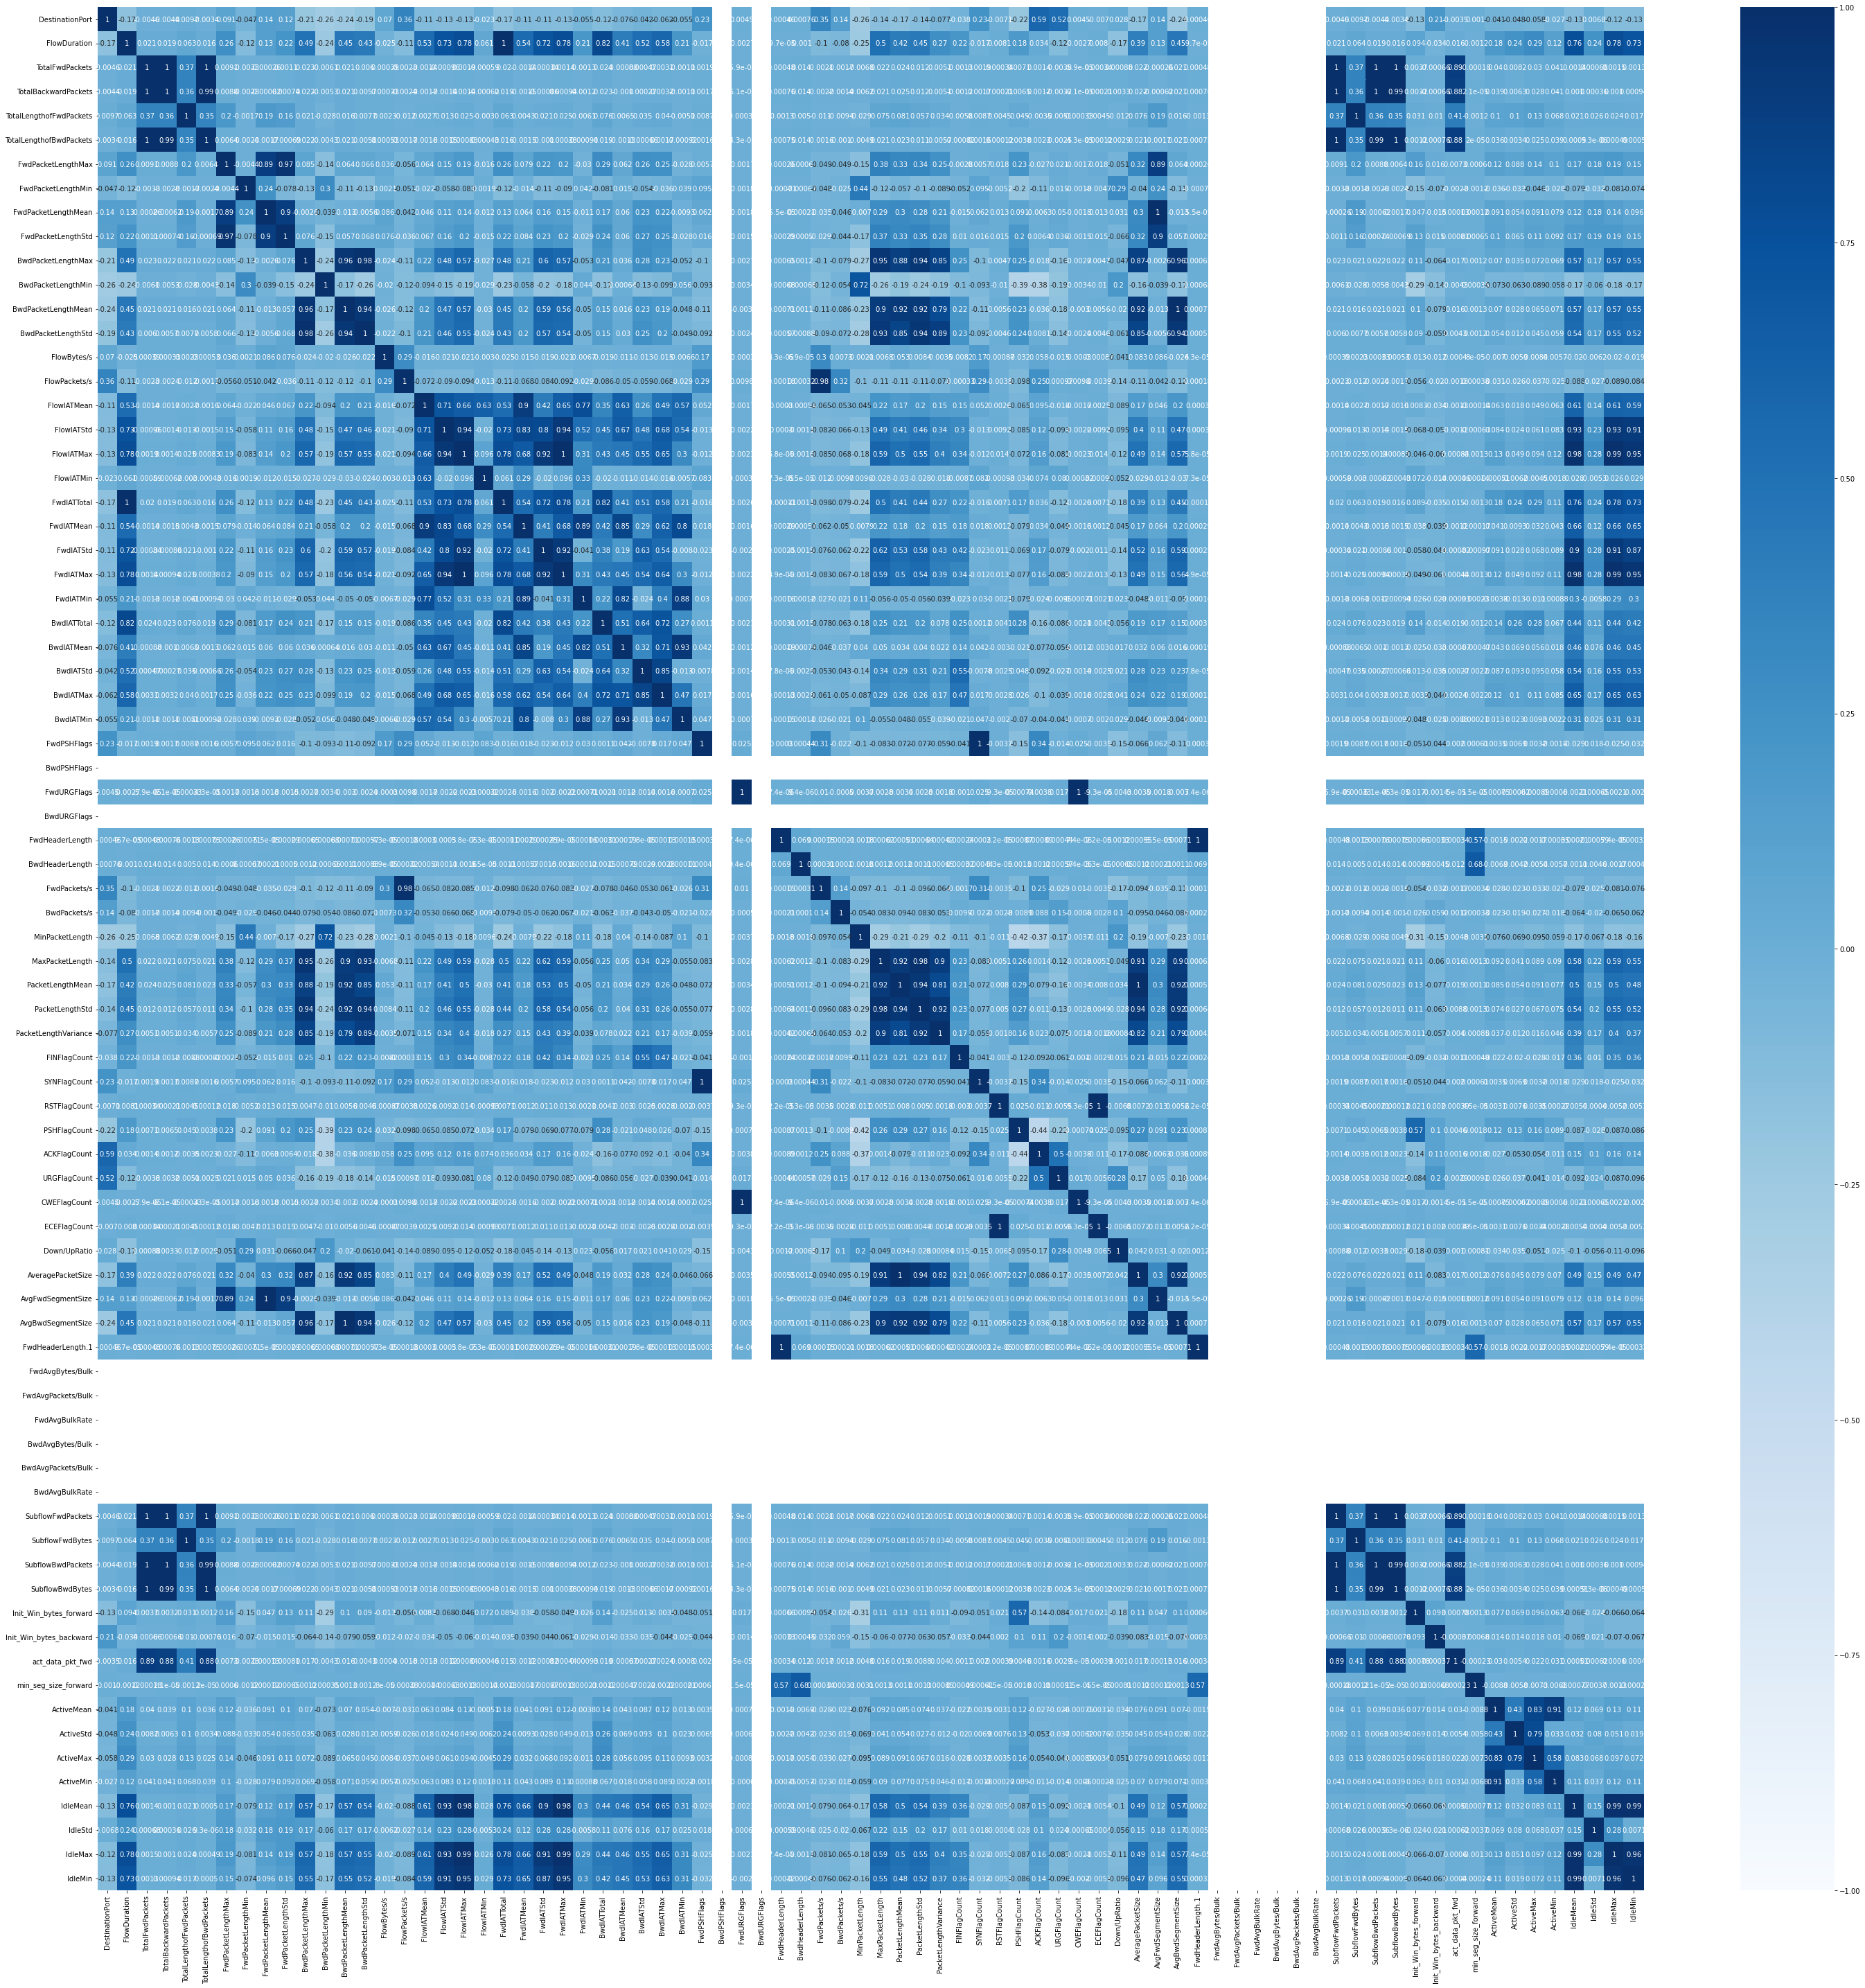

In [ ]:
# Plotando o mapa de correlação entre as features

plt.figure(figsize=(50,50))
sns.heatmap(data=df.corr(), vmin=-1,vmax=1, cmap='Blues', annot=True)

In [ ]:
# Excluindo features desnecessárias pela análise de correlação

df.drop(['BwdPSHFlags'], axis=1, inplace=True)
df.drop(['BwdURGFlags'], axis=1, inplace=True)
df.drop(['FwdAvgBytes/Bulk'], axis=1, inplace=True)
df.drop(['FwdAvgBulkRate'], axis=1, inplace=True)
df.drop(['FwdAvgPackets/Bulk'], axis=1, inplace=True)
df.drop(['BwdAvgBytes/Bulk'], axis=1, inplace=True)
df.drop(['BwdAvgPackets/Bulk'], axis=1, inplace=True)
df.drop(['BwdAvgBulkRate'], axis=1, inplace=True)


In [ ]:
# Plotando boxplots de cada uma das features em relação a variável target

try:
  count=1
  plt.subplots(figsize=(200, 100))
  for i in df.columns:
      plt.subplot(10,8,count)
      sns.boxplot(data=df, x=i, y='Label')
      count+=1

  plt.show()
except:
  pass

In [ ]:
# Separando features onde conseguimos analisar alguma diferença no boxplot

colunasInteresse = ['FlowDuration',
'FwdPacketLengthStd',
'FwdPacketLengthMin',
'BwdPacketLengthMax',
'BwdPacketLengthMin',
'BwdPacketLengthMean',
'BwdPacketLengthStd',
'FlowIATMean',
'FlowIATMax',
'FwdIATTotal',
'FwdIATMean',
'FwdIATStd',
'FwdIATMax',
'MinPacketLength',
'MaxPacketLength',
'PacketLengthMean',
'PacketLengthVariance',
'PacketLengthStd',
'AveragePacketSize',
'AvgBwdSegmentSize',
'IdleMin',
'IdleMean',
'IdleMin',
'Label']

# Modelos


## Preparando para rodar os modelos (Imports, train test e funções)



In [ ]:
#Instalando a biblioteca Numba

!pip install numba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importando as bibliotecas necessárias para rodar os modelos

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Função Auxiliar para métricas

def metricas_anomaly(y_test, y_pred, name):
  results = dict()
  results["Accuracy"] = accuracy_score(y_test, y_pred)
  results["F1 Score"] = f1_score(y_test, y_pred)
  results["ROC_AUC"] = roc_auc_score(y_test, y_pred)
  results["Name"] = name
  return results

In [ ]:
# Função auxiliar para prever os modelos

@jit(target_backend='cuda')
def predict_anomaly(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  return y_pred

In [60]:
# Função auxiliar para criar a matrix de confusão

def matrix(dados, nome):
  plt.figure(figsize=(7,7)),
  plt.title(nome, fontsize=20),
  ax = sns.heatmap(dados, annot=True, cmap='Blues', fmt='.3f')
  ax.set(xlabel='Real', ylabel='Previsto')
  ax.xaxis.tick_top()

In [ ]:
# Simplificando o dataset com as features selecionadas na análise

df_simple = df.filter(items=colunasInteresse, axis=1)

In [ ]:
# Preparando os dados para dividir o dataset entre treino, validação e teste

X = df_simple.drop(columns='Label', axis=1)
y = df_simple.Label
seed = 42

# Pré-processamento da target
le = LabelEncoder()
y = le.fit_transform(y)

# 0 = Attack/ 1 = Bening

# Divindindo os datasets entre treino, validação e teste

X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.7, stratify=y, random_state=seed)

X_test, X_valid, y_test, y_valid = train_test_split(X_rem, y_rem, test_size=0.5, stratify=y_rem, random_state=seed)

In [ ]:
# Pre-processamento dos dados de treino, validação e teste

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [85]:
# Criando o DataFrame onde as métricas ficarão salvas

resultados = []

## Modelo de Classificação - XGBoost


In [ ]:
# Instalando a biblioteca para realizar o Hypertuning

!pip install hyperopt

# Importando as bibliotecas necessárias para rodar o modelo

from hyperopt import STATUS_OK, Trials, fmin, tpe, hp
from xgboost import XGBClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Parâmetros para serem hipertunados

parametros ={ 'max_depth': hp.quniform("max_depth", 3, 10, 1),
             'learning_rate': hp.quniform('learning_rate', 0.1, 1, 0.1 ),
             'n_estimators': hp.uniform('n_estimators', 100, 1000),
             'colsample_bytree': hp.uniform('colsample_bytree', 0.1,1),
             'subsample': hp.uniform('subsample', 0.1, 1),
             'reg_alpha': hp.uniform('reg_alpha', 0, 100),
             'reg_lambda': hp.uniform('reg_lambda', 0, 100),
             'gamma': hp.uniform ('gamma', 1, 9),          
}

In [ ]:
# Função para hypertuning

def objective(parametros):
  clf = XGBClassifier(
      max_depth=int(parametros['max_depth']),
      learning_rate=parametros['learning_rate'],
      n_estimators=int(parametros['n_estimators']),
      colsample_bytree=parametros['colsample_bytree'],
      subsample=parametros['subsample'],
      reg_alpha=parametros['reg_alpha'],
      reg_lambda=parametros['reg_lambda'],
      gamma=parametros['gamma'],
      random_state=42)
   
  clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='auc', early_stopping_rounds=10)

  pred = clf.predict(X_valid)
  auc = roc_auc_score(y_valid, pred)
  print('Score:', auc)
  return {'loss': -auc, 'status': STATUS_OK}

In [ ]:
# Realizando o hypertuning

trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = parametros,
                        algo = tpe.suggest,
                        max_evals=50,
                        trials=trials, 
                        rstate= np.random.RandomState(42))

A saída de streaming foi truncada nas últimas 5000 linhas.

[33]	validation_0-auc:0.998434	validation_1-auc:0.995283

[34]	validation_0-auc:0.998508	validation_1-auc:0.995337

[35]	validation_0-auc:0.99857	validation_1-auc:0.995506

[36]	validation_0-auc:0.998601	validation_1-auc:0.995451

[37]	validation_0-auc:0.998644	validation_1-auc:0.995413

[38]	validation_0-auc:0.998677	validation_1-auc:0.995461

[39]	validation_0-auc:0.998771	validation_1-auc:0.995874

[40]	validation_0-auc:0.998776	validation_1-auc:0.995917

[41]	validation_0-auc:0.998805	validation_1-auc:0.995919

[42]	validation_0-auc:0.998813	validation_1-auc:0.995991

[43]	validation_0-auc:0.998847	validation_1-auc:0.99576

[44]	validation_0-auc:0.998896	validation_1-auc:0.995799

[45]	validation_0-auc:0.998916	validation_1-auc:0.995788

[46]	validation_0-auc:0.998929	validation_1-auc:0.995803

[47]	validation_0-auc:0.998961	validation_1-auc:0.995723

[48]	validation_0-auc:0.998966	validation_1-auc:0.995667

[49]	validatio

In [ ]:
# Printando os melhores parâmetros

print(best_hyperparams)

{'colsample_bytree': 0.18689959396729033, 'gamma': 2.9947111606439107, 'learning_rate': 0.9, 'max_depth': 3.0, 'n_estimators': 635.1247892525114, 'reg_alpha': 42.05354493313075, 'reg_lambda': 58.07819740955661, 'subsample': 0.36801627604489917}


In [ ]:
# Definindo o modelo com os melhores parâmetros

xgb = XGBClassifier(
      max_depth=int(best_hyperparams['max_depth']),
      learning_rate=best_hyperparams['learning_rate'],
      n_estimators=int(best_hyperparams['n_estimators']),
      colsample_bytree=best_hyperparams['colsample_bytree'],
      subsample=best_hyperparams['subsample'],
      reg_alpha=best_hyperparams['reg_alpha'],
      reg_lambda=best_hyperparams['reg_lambda'],
      gamma=best_hyperparams['gamma'],
      random_state=42)

### Train/ Valid

In [86]:
# Rodando o modelo no treino e validação com os melhores hiperparâmetros

y_pred = predict_anomaly(xgb, X_train, y_train, X_valid, y_valid)

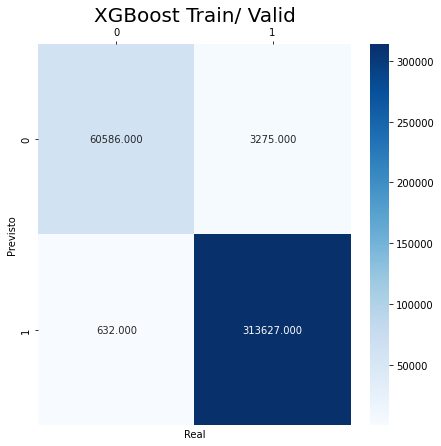

In [87]:
# Mostrando a matrix de confusão do modelo rodado

conf_matrix = confusion_matrix(y_true=y_valid, y_pred=y_pred)
matrix(conf_matrix, 'XGBoost Train/ Valid')

In [88]:
# Exibindo as métricas do modelo rodado

xgb_metrics = metricas_anomaly(y_valid, y_pred, "XGBoost Train/ Valid")
xgb_metrics

{'Accuracy': 0.9896673013858035,
 'F1 Score': 0.9938098203152603,
 'ROC_AUC': 0.9733528320730257,
 'Name': 'XGBoost Train/ Valid'}

In [89]:
# Colocando os resultados em um dataframe

resultados.append(xgb_metrics)
df_results = pd.DataFrame(resultados)
df_results

,Accuracy,F1 Score,ROC_AUC,Name
0,0.989667,0.99381,0.973353,XGBoost Train/ Valid


## Modelo de anomalia - Isolation Forest

In [ ]:
# Importando as bibliotecas necessárias para rodar o modelo

from sklearn.ensemble import IsolationForest

In [ ]:
# Paramêtros para serem hipertunados

parametros ={'n_estimators': hp.uniform('n_estimators', 100, 1000),
             'max_samples': hp.uniform('max_samples', 100, 1000),
             'bootstrap': hp.choice('bootstrap', [True, False])
}

In [ ]:
# Função para hypertuning

def objective(parametros):
  clf = IsolationForest(
      n_estimators=int(parametros['n_estimators']),
      max_samples=int(parametros['max_samples']),
      bootstrap=parametros['bootstrap'],
      contamination=0.165,
      n_jobs= -1,
      random_state=42)
   
  clf.fit(X_train, y_train)

  pred = clf.predict(X_valid)
  pred = np.where(pred == -1, 0, 1)
  auc = roc_auc_score(y_valid, pred)
  print('Score:', auc)
  return {'loss': -auc, 'status': STATUS_OK}

In [ ]:
# Realizando o hypertuning

trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = parametros,
                        algo = tpe.suggest,
                        max_evals=50,
                        trials=trials, 
                        rstate= np.random.RandomState(42))

Score:
0.7503038099035404
Score:
0.750544686182036
Score:
0.7515636655787591
Score:
0.7504096555719717
Score:
0.7534887117224043
Score:
0.7518110750274436
Score:
0.7512533294934566
Score:
0.7508684224826175
Score:
0.7510307090042446
Score:
0.751296916275072
Score:
0.7492715992844086
Score:
0.7521945599868232
Score:
0.753191433755801
Score:
0.7531891007423324
Score:
0.7511499116120277
Score:
0.7514220234683298
Score:
0.7534994718818834
Score:
0.751508650887862
Score:
0.7510676801746557
Score:
0.7506294711233529
Score:
0.7538332573162145
Score:
0.7527181557315873
Score:
0.7521136248839679
Score:
0.7538507155279136
Score:
0.7530814002631675
Score:
0.7527967805427044
Score:
0.7513869772171495
Score:
0.7532497995282277
Score:
0.7522781743105663
Score:
0.7537109117848602
Score:
0.7536157397240534
Score:
0.7518071819130544
Score:
0.7529887548737358
Score:
0.7511773365164607
Score:
0.7531860753140251
Score:
0.7525137313123741
Score:
0.7536277611638005
Score:
0.7529198247672703
Score:
0.7540104

In [ ]:
# Printando os melhores parâmetros

print(best_hyperparams)

{'bootstrap': 0, 'max_samples': 226.44944192945024, 'n_estimators': 311.86454817030017}


In [ ]:
# Definindo o modelo com os melhores parâmetros

isolf = IsolationForest(n_estimators=int(best_hyperparams['n_estimators']),
                        max_samples=int(best_hyperparams['max_samples']),
                        bootstrap=True,
                        contamination=0.165,
                        n_jobs=-1,
                        random_state=seed)

### Train/ Valid

In [68]:
# Rodando o modelo no treino e validação com os melhores hiperparâmetros

y_pred = predict_anomaly(isolf, X_train, y_train, X_valid, y_valid)
y_pred = np.where(y_pred == -1, 0, 1)

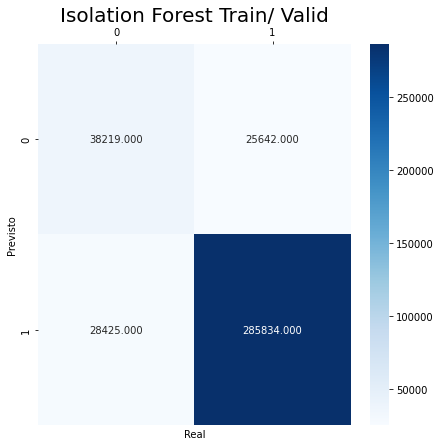

In [69]:
# Mostrando a matrix de confusão do modelo rodado

conf_matrix = confusion_matrix(y_true=y_valid, y_pred=y_pred)
matrix(conf_matrix, 'Isolation Forest Train/ Valid')

In [70]:
# Exibindo as métricas do modelo rodado

isolf_metrics = metricas_anomaly(y_valid, y_pred, "Isolation Forest Train/ Valid")
isolf_metrics

{'Accuracy': 0.8570110017983709,
 'F1 Score': 0.9135944129703468,
 'ROC_AUC': 0.7540104052696681,
 'Name': 'Isolation Forest Train/ Valid'}

In [90]:
# Colocando os resultados em um dataframe

resultados.append(isolf_metrics)
df_results = pd.DataFrame(resultados)
df_results

,Accuracy,F1 Score,ROC_AUC,Name
0,0.989667,0.993810,0.973353,XGBoost Train/ Valid
1,0.857011,0.913594,0.754010,Isolation Forest Train/ Valid


## Modelo de Rede Neural Feedforward

In [71]:
import tensorflow as tf

 # Inicializar ANN

ann = tf.keras.models.Sequential()

 # Primeira camada oculta

ann.add(tf.keras.layers.Dense(units=20,activation="relu"))

 # Segunda camada oculta

ann.add(tf.keras.layers.Dense(units=20,activation="relu"))

 # Camada de output

ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

 # Compilador da ANN

ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy','AUC'])

 # Fit nos dados de treino

ann.fit(X_train,y_train,batch_size=32,epochs = 10)

Epoch 1/10
55143/55143 [==============================] - 103s 2ms/step - loss: 0.1240 - accuracy: 0.9523 - auc: 0.9799
Epoch 2/10
55143/55143 [==============================] - 103s 2ms/step - loss: 0.0821 - accuracy: 0.9678 - auc: 0.9895
Epoch 3/10
55143/55143 [==============================] - 101s 2ms/step - loss: 0.0774 - accuracy: 0.9690 - auc: 0.9907
Epoch 4/10
55143/55143 [==============================] - 103s 2ms/step - loss: 0.0743 - accuracy: 0.9701 - auc: 0.9914
Epoch 5/10
55143/55143 [==============================] - 102s 2ms/step - loss: 0.0720 - accuracy: 0.9709 - auc: 0.9920
Epoch 6/10
55143/55143 [==============================] - 103s 2ms/step - loss: 0.0699 - accuracy: 0.9717 - auc: 0.9927
Epoch 7/10
55143/55143 [==============================] - 103s 2ms/step - loss: 0.0686 - accuracy: 0.9722 - auc: 0.9930
Epoch 8/10
55143/55143 [==============================] - 102s 2ms/step - loss: 0.0674 - accuracy: 0.9728 - auc: 0.9933
Epoch 9/10
55143/55143 [================

### Train/ Valid

In [72]:
 # Predict nos dados de teste
 
y_pred = ann.predict(X_valid)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1
y_pred = y_pred.reshape(-1)

11817/11817 [==============================] - 13s 1ms/step


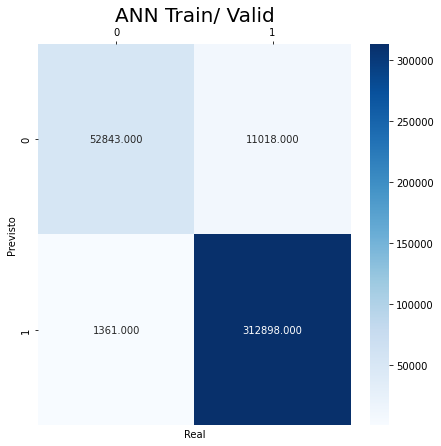

In [73]:
  # Matriz de confusão 
conf_matrix = confusion_matrix(y_true=y_valid, y_pred=y_pred)
matrix(conf_matrix, 'ANN Train/ Valid')

In [52]:
  # Métricas de teste
ann_metrics_validacao = metricas_anomaly(y_valid,y_pred,"ANN Train/ Valid")
ann_metrics_validacao

{'Accuracy': 0.9662091399555697,
 'F1 Score': 0.9798798491421732,
 'ROC_AUC': 0.9194887993538403,
 'Name': 'ANN Train/ Valid'}

In [92]:
# Colocando os resultados em um dataframe

resultados.append(ann_metrics_validacao)
df_results = pd.DataFrame(resultados)
df_results

,Accuracy,F1 Score,ROC_AUC,Name
0,0.989667,0.993810,0.973353,XGBoost Train/ Valid
1,0.857011,0.913594,0.754010,Isolation Forest Train/ Valid
2,0.966209,0.979880,0.919489,ANN Train/ Valid


# Resultados Train/ Test


## XGBoost

In [74]:
# Rodando o modelo no treino e teste com os melhores hiperparâmetros

y_pred = predict_anomaly(xgb, X_train, y_train, X_test, y_test)

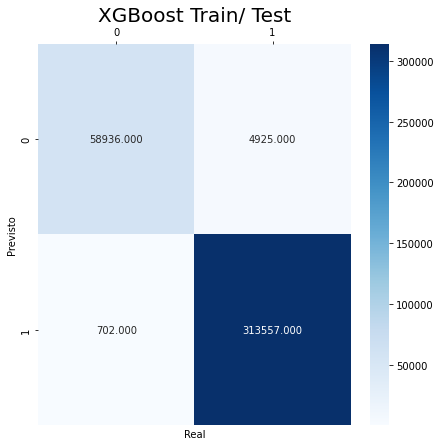

In [75]:
 # Matriz de confusão de teste

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
matrix(conf_matrix, 'XGBoost Train/ Test')

In [76]:
  # Métricas de teste
xgboost_metrics_teste = metricas_anomaly(y_test, y_pred, "XGBoost Train/ Test")
xgboost_metrics_teste

{'Accuracy': 0.9851184809055327,
 'F1 Score': 0.9911069458119515,
 'ROC_AUC': 0.96032277620582,
 'Name': 'XGBoost Train/ Test'}

In [93]:
# Colocando os resultados em um dataframe

resultados.append(xgboost_metrics_teste)
df_results = pd.DataFrame(resultados)
df_results

,Accuracy,F1 Score,ROC_AUC,Name
0,0.989667,0.993810,0.973353,XGBoost Train/ Valid
1,0.857011,0.913594,0.754010,Isolation Forest Train/ Valid
2,0.966209,0.979880,0.919489,ANN Train/ Valid
3,0.985118,0.991107,0.960323,XGBoost Train/ Test


## Isolation Forest

In [77]:
 # Predict nos dados de teste
y_pred = predict_anomaly(isolf, X_train, y_train, X_test, y_test)
y_pred = np.where(y_pred == -1, 0, 1)

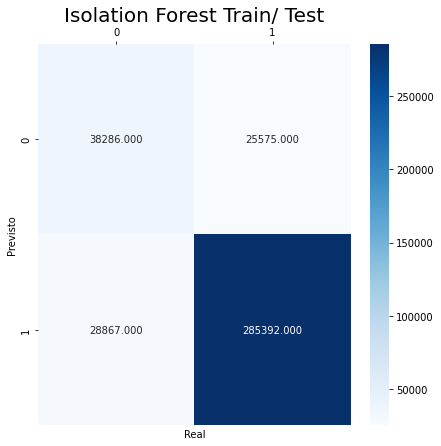

In [78]:
  # Matriz de confusão 
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
matrix(conf_matrix, 'Isolation Forest Train/ Test')

In [79]:
  # Métricas de teste
isolf_metrics_teste = metricas_anomaly(y_test,y_pred,"Isolation Forest Train/ Test")
isolf_metrics_teste

{'Accuracy': 0.8560192531471491,
 'F1 Score': 0.9129242865779733,
 'ROC_AUC': 0.7538317404912215,
 'Name': 'Isolation Forest Train/ Test'}

In [94]:
# Colocando os resultados em um dataframe

resultados.append(isolf_metrics_teste)
df_results = pd.DataFrame(resultados)
df_results

,Accuracy,F1 Score,ROC_AUC,Name
0,0.989667,0.993810,0.973353,XGBoost Train/ Valid
1,0.857011,0.913594,0.754010,Isolation Forest Train/ Valid
2,0.966209,0.979880,0.919489,ANN Train/ Valid
3,0.985118,0.991107,0.960323,XGBoost Train/ Test
4,0.856019,0.912924,0.753832,Isolation Forest Train/ Test


## Rede Neural Feedforward

In [96]:
 # Predict nos dados de teste
y_pred = ann.predict(X_test)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1
y_pred = y_pred.reshape(-1)

11817/11817 [==============================] - 13s 1ms/step


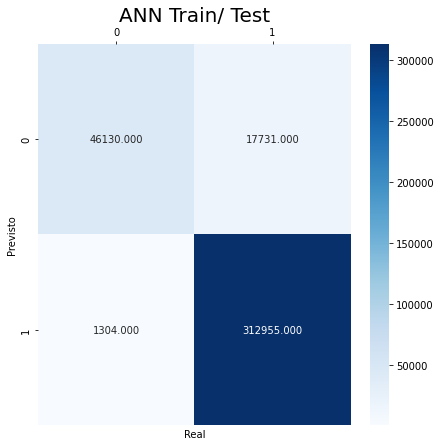

In [97]:
  # Matriz de confusão 
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
matrix(conf_matrix, 'ANN Train/ Test')

In [98]:
  # Métricas de teste
ann_metrics_teste = metricas_anomaly(y_test,y_pred,"ANN Train/ Test")
ann_metrics_teste

{'Accuracy': 0.9496588384639797,
 'F1 Score': 0.9704858553830171,
 'ROC_AUC': 0.8591003302603073,
 'Name': 'ANN Train/ Test'}

In [95]:
# Colocando os resultados em um dataframe

resultados.append(ann_metrics_teste)
df_results = pd.DataFrame(resultados)
df_results

,Accuracy,F1 Score,ROC_AUC,Name
0,0.989667,0.993810,0.973353,XGBoost Train/ Valid
1,0.857011,0.913594,0.754010,Isolation Forest Train/ Valid
2,0.966209,0.979880,0.919489,ANN Train/ Valid
3,0.985118,0.991107,0.960323,XGBoost Train/ Test
4,0.856019,0.912924,0.753832,Isolation Forest Train/ Test
5,0.949659,0.970486,0.859100,ANN Train/ Test
